In [7]:
%run helper.ipynb

In [8]:
file_path="/Users/lohith/Desktop/NEU_Courses/ThirdSemester/CS6510-ASD/data/TheGovernmentFinanceDatabase_CountyData/CountyData.csv"
ignore=set(['YearofData','IDChanged','FIPS_Place','YearPop','SchLevCode','FunctionCode'])

In [9]:
county = pd.read_csv(file_path)

In [18]:
county.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,11002002,NaN,1,1,2,BALDWIN COUNTY,1,...,0,0,0,0,0,0,95519,14789,0,80730
1,16,2016,NaN,11005005,NaN,1,1,5,BLOUNT COUNTY,1,...,0,0,0,0,0,0,11092,0,0,11092
2,16,2016,NaN,11008008,NaN,1,1,8,CALHOUN COUNTY,1,...,0,0,0,0,0,0,27871,0,0,27871
3,16,2016,NaN,11010010,NaN,1,1,10,CHEROKEE COUNTY,1,...,0,0,0,0,0,0,4074,340,0,3734
4,16,2016,NaN,11015015,NaN,1,1,15,CLEBURNE COUNTY,1,...,0,0,0,0,0,0,4259,72,0,4187


In [12]:
stats = get_stats(county)

In [24]:
all_nans = [x for x,y in stats.items() if y['nans'][1] == 1]

In [25]:
all_nans

['SchLevCode', 'FunctionCode', 'Enrollment']

In [26]:
all_zeros = [x for x,y in stats.items() if y['zeros'][1] == 1]

In [31]:
len(all_zeros),len(all_nans)

(36, 3)

In [13]:
zero_or_nan = [x for x,y in stats.items() if y['zeros'][1] + y['nans'][1] == 1]

In [14]:
to_drop = set(zero_or_nan)

In [56]:
total_instances = len(county)

In [57]:
for i in zero_or_nan:
    l= len(county.loc[(county[i] != county[i]) | (county[i] == 0)])
    if l != total_instances:
        print(i, l)


Educ_NEC_Cap_Outlay 104149
Emp_Sec_Adm_Direct_Exp 104150
Emp_Sec_Adm_Cap_Outlay 104150
Emp_Sec_Adm_Construct 104150
Welf_Cash_IG_Local_Govts 104148
LTD_Iss_NG_Trans_Util 104147
LTD_Iss_NG_Other_Educ 104146
LTD_Ret_NG_Elem_Educ 104146


In [55]:
county['Educ_NEC_Cap_Outlay'].value_counts()

0     104149
17         1
1          1
Name: Educ_NEC_Cap_Outlay, dtype: int64

In [37]:
negatives = [x for x,y in stats.items() if y['negatives'][1] > 0 if y['negatives'][1] < .9]

In [60]:
for i in negatives:
    print(i,stats[i]['negatives'])

Total_Revenue (8, 0.0001)
Total_Rev_Own_Sources (15, 0.0001)
Total_Insur_Trust_Rev (219, 0.0021)
Tot_Ins_Trust_Inv_Rev (326, 0.0031)
Total_Emp_Ret_Rev (219, 0.0021)
Emp_Ret_Int_Rev (326, 0.0031)
LTD_Out_Gen_Other_NEC (6, 0.0001)
Sinking_Fd_Cash___Sec (13, 0.0001)


** We can safely drop below features **
```
SurveyYr
YearofData
IDChanged
```

In [15]:
to_drop.update(['SurveyYr','YearofData','IDChanged'])

In [16]:
print(to_drop)

{'Unemp_Comp_Bal_In_US_Trs', 'Welf_Cash_IG_Local_Govts', 'Unemp_Comp_Other_Balance', 'Hunting___Fishing_License', 'Unemp_Comp_Ben_Paymts', 'Educ_NEC_Cap_Outlay', 'SchLevCode', 'Educ_NEC_Assistance', 'Emp_Sec_Adm_Direct_Exp', 'Emp_Sec_Adm_Construct', 'VetBonus', 'Unemp_Comp_Total_Exp', 'SurveyYr', 'Local_IGR_InterSchool_Aid', 'LTD_Iss_NG_Gas_Util', 'Unemp_Comp_Cash___Sec', 'LTD_Iss_NG_Other_Educ', 'IDChanged', 'LTD_Iss_NG_Trans_Util', 'FunctionCode', 'Elem_Educ_IG_Sch_to_Sch', 'Enrollment', 'LTD_Iss_NG_Elec_Util', 'Net_Lottery_Revenue', 'LTD_Ret_NG_Elec_Util', 'Total_Educ_Assist___Sub', 'Unemp_Payroll_Tax', 'Emp_Ret_Other_Earnings', 'Unemp_Federal_Advances', 'Total_Unemp_Rev', 'LTD_Ret_NG_Gas_Util', 'Emp_Sec_Adm_Cap_Outlay', 'LTD_Ret_NG_Elem_Educ', 'Educ_NEC_Construction', 'Unemp_Int_Revenue', 'Educ_NEC_IG_To_State', 'Unemp_Ext___Spec_Pmts', 'Fed_IGR_Emp_Sec_Adm', 'Emp_Sec_Adm_Current_Exp', 'LTD_Iss_NG_Elem_Educ', 'Welf_State_Share_Part_D', 'Water_Trans_IG_To_Sta', 'YearofData'}


In [79]:
print(negatives)

['Total_Revenue', 'Total_Rev_Own_Sources', 'Total_Insur_Trust_Rev', 'Tot_Ins_Trust_Inv_Rev', 'Total_Emp_Ret_Rev', 'Emp_Ret_Int_Rev', 'LTD_Out_Gen_Other_NEC', 'Sinking_Fd_Cash___Sec']


In [97]:
len(county.keys()), len(county)

(594, 104151)

In [17]:
county = county.drop(columns=to_drop)

In [18]:
len(county.keys()), len(county)

(551, 104151)

Let's Use a unique name for a geographic location

For eg: 

    'FORT BEND COUNTY'     == 'FT BEND COUNTY'

    'OGLALA LAKOTA COUNTY' == 'SHANNON COUNTY' etc.,

In [169]:
id_name_map=county.groupby(['ID'])['Name'].unique().to_dict() 

In [170]:
l=[]
for i,j in id_name_map.items():
    if len(j) > 1:
        print(i,j)
        l.append(i)

21028028 ['SKAGWAY BOROUGH' 'GREATER JUNEAU AREA BOROUGH']
101013013 ['MIAMI-DADE COUNTY' 'METROPOLITAN DADE COUNTY']
141019019 ['DEKALB COUNTY' 'DE KALB COUNTY']
141022022 ['DUPAGE COUNTY' 'DU PAGE COUNTY']
141050050 ['LASALLE COUNTY' 'LA SALLE COUNTY']
191030029 ['LASALLE PARISH' 'LA SALLE PARISH']
191048046 ['ST JOHN THE BAPTIST PARISH' 'ST. JOHN THE BAPTIST PARISH']
421057057 ['OGLALA LAKOTA COUNTY' 'SHANNON COUNTY']
441079079 ['FORT BEND COUNTY' 'FT BEND COUNTY']


In [182]:
# temp = temp.apply(lambda x: replace_name(x), axis=1)

In [183]:
county = pd.merge(_county,temp)

In [185]:
county.head()

,Year4,ID,State_Code,Type_Code,County,Name,FIPS_Code_State,FIPS_County,FIPS_Place,FYEndDate,...,Emp_Retire_Sec_Tot_Nong,Emp_Retire_Sec_Corp_Bds,Emp_Retire_Sec_Corp_Stk,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec


## Initial set of features ##

``` 
Total_Revenue
Population
Year4
```

** Total_Revenue **

In [19]:
stats['Total_Revenue']

{'nans': (0, 0.0), 'zeros': (23, 0.0002), 'negatives': (8, 0.0001)}

In [20]:
tr=county.loc[county['Total_Revenue'] <= 0][['Year4','ID','Total_Revenue','Population']]

In [21]:
id_list = tr['ID'].unique().tolist()

In [22]:
countys_missing_TR = county.loc[county['ID'].isin(id_list)]

In [23]:
len(countys_missing_TR)

844

In [37]:
from matplotlib import pyplot
import seaborn as sns

In [44]:
df = countys_missing_TR.groupby([,'Year4']).head()

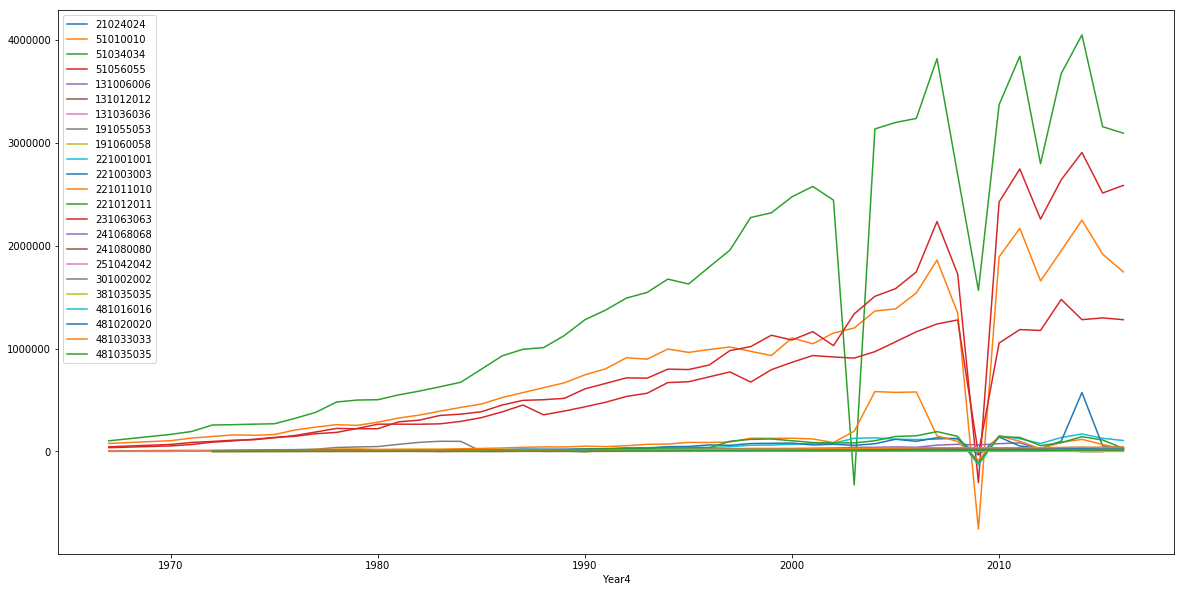

In [84]:
df_grouped = countys_missing_TR.groupby('ID')
fig, ax = pyplot.subplots(figsize=(20,10))
for key, group in df_grouped:
    group.groupby('Year4')['Total_Revenue'].mean().plot(ax=ax,label=key,legend=True)


In [78]:
for id_ in id_list:
    l=countys_missing_TR.loc[countys_missing_TR['ID'] == id_]['Year4'].values
    print(id_,l,len(l))
    break
    

381035035 [2016 2015 2014 2012 2007 2002 1997 1992 1990 1987 1986 1985 1984 1982
 1981 1979 1977 1972] 18


In [75]:
print(id_list)

[381035035, 241068068, 241080080, 51010010, 51056055, 221001001, 221003003, 221011010, 221012011, 231063063, 51034034, 191060058, 481016016, 481020020, 481033033, 481035035, 21024024, 131012012, 191055053, 131006006, 131036036, 301002002, 251042042]


In [83]:
county.loc[(county['ID'] == 481035035) & ( county['Year4'] == 1990)]['Total_Revenue']

53574    0
Name: Total_Revenue, dtype: int64